INFO:__main__:Script Starting at 2019-10-10 18:32:15.606194
INFO:__main__:Iterating through layers in Feature Layer "service_d5a26ba7fee8434dafe9403fd67ad059"


<Item title:"citizenMorph EN" type:Feature Layer Collection owner:citizenMorph_ZGIS>
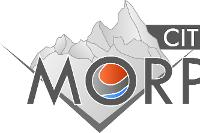

INFO:__main__:Time: 2019-10-10 18:32:24.863559
INFO:__main__:Currently looping through feature attachments in layer 1 of 1: storing in folder named "0-surveyPoint"
INFO:__main__:There are 60 features to iterate in this layer
INFO:__main__:The size of the current attachment being downloaded is 0.288426MB
INFO:__main__:../ScriptDownloads\\0-surveyPoint\\5f780bb1-dc37-4fc0-8ba7-0d518f961ef0\15663871483551841638118.jpg being renamed as ../ScriptDownloads\\0-surveyPoint\\5f780bb1-dc37-4fc0-8ba7-0d518f961ef0\1-15663871483551841638118.jpg
INFO:__main__:The size of the current attachment being downloaded is 3.798316MB
INFO:__main__:../ScriptDownloads\\0-surveyPoint\\8851753f-e228-40a4-8766-81873775dfa2\389989CF-7C6A-4A55-BE0A-DAA6B01B283D.jpeg being renamed as ../ScriptDownloads\\0-surveyPoint\\8851753f-e228-40a4-8766-81873775dfa2\2-389989CF-7C6A-4A55-BE0A-DAA6B01B283D.jpeg
INFO:__main__:The size of the current attachment being downloaded is 5.969632MB
INFO:__main__:../ScriptDownloads\\0-surve

INFO:__main__:The size of the current attachment being downloaded is 7.640703MB
INFO:__main__:../ScriptDownloads\\0-surveyPoint\\6c33da1c-a338-4728-8fa1-23e1bfe02446\20190905_093049.jpg being renamed as ../ScriptDownloads\\0-surveyPoint\\6c33da1c-a338-4728-8fa1-23e1bfe02446\26-20190905_093049.jpg
INFO:__main__:The size of the current attachment being downloaded is 5.563078MB
INFO:__main__:../ScriptDownloads\\0-surveyPoint\\6a9bb42b-5d47-4dcd-898e-5dfac4f1fc55\image.jpg being renamed as ../ScriptDownloads\\0-surveyPoint\\6a9bb42b-5d47-4dcd-898e-5dfac4f1fc55\27-image.jpg
INFO:__main__:The size of the current attachment being downloaded is 3.887831MB
INFO:__main__:../ScriptDownloads\\0-surveyPoint\\8e9ed414-ef92-4851-8467-516c7d572a43\image.jpg being renamed as ../ScriptDownloads\\0-surveyPoint\\8e9ed414-ef92-4851-8467-516c7d572a43\28-image.jpg
INFO:__main__:The size of the current attachment being downloaded is 5.076398MB
INFO:__main__:../ScriptDownloads\\0-surveyPoint\\5bbd6b5e-899a-46b

{'5cc6cbf1-06ff-47ab-88c4-f725f7d6fc73': 1, 'f40878f1-ed27-46bc-8038-a45801850e68': 2, '290abfaa-d5b1-42b6-80ee-d4786646c3bf': 3, '1591e8b8-155c-4a7e-8162-0524910b4b12': 4, 'c389526f-ec84-410c-80c9-ee1fea113b86': 5, '04be2501-6331-4c00-84db-a1e6fdf0b614': 6, '858b5a2c-23be-4b7a-8577-1b86c151810f': 7, 'd918a849-be04-45f0-8704-07005df97609': 8, '635a80b4-e4bf-4018-8864-b86aaea42c3a': 9, '9a83f99d-dea1-4fb6-81c6-5d364e5e4201': 10, 'd441b7a7-d607-48af-84cc-eeb356650080': 11, '280f4349-5fea-4783-87d0-420e02ec1b62': 12, '1f2033e2-eede-4846-83f9-0391abe64f5e': 13, '4be537ef-d074-48d9-8c0b-86ba3a16fbaa': 14, '1ce65c00-bad6-4fb1-860e-266034cedc30': 16, 'b7a0bf43-a1ee-4e3f-8c20-c89453f72b7c': 17, 'c39311da-abac-4c20-854e-f8faca4778e9': 18, '151b8f80-3453-4173-896d-68500f625e64': 19, 'dcc4c188-8073-4507-8416-845134da8181': 21, 'e92c24d9-9d70-4a9d-85d2-01433ee48cec': 22, '8aa57f45-ff2b-4b62-8a57-ecff16740dc6': 23, '2a3ec745-ddac-44d5-8544-63254c15c5e9': 24, '90a66a84-4ea3-47ab-8557-c9b67476e47f': 

In [47]:
# Version 1.2

import logging, os, re, datetime
from IPython.display import display
from arcgis.gis import GIS

''' ********************** SCRIPT CONFIGURATION START ********************** '''

#What is the ID of the Feature Layer you want to download attachments from?
FeatureLayerId = 'cf4004ce88cd4061bf91d9f0456ddfec'

#What are your ArcGIS Enterprise/ArcGIS Online credentials? This is case sensitive.
PortalUserName = 'citizenMorph_ZGIS'
PortalPassword = ''
PortalUrl = 'https://zgis.maps.arcgis.com'

#Where do you want your attachments stored?
SaveAttachmentsTo = '../ScriptDownloads'
SaveLogsTo = 'Logging'

#How do you want your attachments stored? Options are GroupedFolder and IndividualFolder
#GroupedFolder - Attachments from every feature in each layer is stored in the same folder - attachments are renamed in the format OBJECTID-ATTACHMENTID-OriginalFileName
#IndividualFolder - A new folder is created for each OBJECTID, and associated attachments are stored in that folder - attachments are renamed in the format ATTACHMENTID-OriginalFileName
AttachmentStorage = 'IndividualFolder'

#Set to False if ArcGIS Enterprise cert is not valid
PortalCertVerification = True

#Setup logging - levels are DEBUG,INFO,WARNING,ERROR,CRITICAL
logging.basicConfig(level=logging.INFO)

''' ********************** SCRIPT CONFIGURATION END ********************** '''

#https://stackoverflow.com/questions/273192/how-can-i-create-a-directory-if-it-does-not-exist
def createFolder(folderPath):
    if not os.path.exists(folderPath):
        try:
            os.makedirs(folderPath)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise

def renameFile(currentAttachmentPath, newAttachmentPath):
    #Rename file - ensure new attachment path does not exist already
    if not os.path.exists(newAttachmentPath):
        os.rename(currentAttachmentPath, newAttachmentPath)
        logger.info('{} being renamed as {}'.format(currentAttachmentPath, newAttachmentPath))
    else:
        logger.warning('Not able to rename {} as {} because file already exists. Removing {}'.format(currentAttachmentPath, newAttachmentPath, currentAttachmentPath))
        os.remove(currentAttachmentPath)

#Create specified folder if it does not exist already
createFolder(SaveAttachmentsTo)
createFolder(SaveLogsTo)
        
#Logging level specified in script configuration
logger = logging.getLogger(__name__)
logFileName = datetime.datetime.now().strftime('%Y-%m-%d %H-%M-%S')
fileHandler = logging.handlers.RotatingFileHandler('{}/{}.log'.format(SaveLogsTo, logFileName), maxBytes=100000, backupCount=5)
formatter = logging.Formatter('%(asctime)s %(levelname)s %(relativeCreated)d \n%(filename)s %(module)s %(funcName)s %(lineno)d \n%(message)s\n')
fileHandler.setFormatter(formatter)
logger.addHandler(fileHandler)

logger.info('Script Starting at {}'.format(str(datetime.datetime.now())))

#Connect to GIS, and get Feature Layer information
if PortalUserName == '' and PortalPassword == '':
    gis = GIS()
else:
    gis = GIS(PortalUrl, PortalUserName, PortalPassword, verify_cert=PortalCertVerification)

downloadCounter = 0
nonDownloadCounter = 0
downloadSizeCounter = 0

itemObject = gis.content.get(FeatureLayerId)
logger.info('Iterating through layers in Feature Layer "{}"'.format(itemObject.name))
display(itemObject)

## id_dict = {}
#Loop through layers in Feature Layer
for i in range(len(itemObject.layers)):
    featureLayer = itemObject.layers[i]
    
    #Skip layer if attachments are not enabled
    if featureLayer.properties.hasAttachments == True:
        #Remove any characters from feature layer name that may cause problems and ensure it's unique...
        featureLayerName = '{}-{}'.format(str(i), re.sub(r'[^A-Za-z0-9]+', '', featureLayer.properties.name))
        featureLayerFolder = SaveAttachmentsTo + r'\\' + featureLayerName
        createFolder(featureLayerFolder)

        #Query to get list of object ids in layer
        featureObjectIds = featureLayer.query(where='1=1', return_ids_only=True)

        #Provide some updates to user...
        logger.info('Time: {}'.format(str(datetime.datetime.now())))
        logger.info('Currently looping through feature attachments in layer {} of {}: storing in folder named "{}"'.format(str(i + 1), str(len(itemObject.layers)), featureLayerName))
        logger.info('There are {} features to iterate in this layer'.format(str(len(featureObjectIds['objectIds']))))

        #Loop through features in layer
        emptyAttachments = 0
        for j in range(len(featureObjectIds['objectIds'])):
            currentObjectId = featureObjectIds['objectIds'][j]
            currentObjectIdAttachments = featureLayer.attachments.get_list(oid=currentObjectId)

            if len(currentObjectIdAttachments) > 0:

                #Loop through feature attachments and download to appropriate folder
                for k in range(len(currentObjectIdAttachments)):
                    attachmentParentGlobalId = currentObjectIdAttachments[k]['parentGlobalId']
                    attachmentId = currentObjectIdAttachments[k]['id']
                    attachmentName = currentObjectIdAttachments[k]['name']
                    attachmentSize = currentObjectIdAttachments[k]['size']
                    
                    ## id_dict[attachmentGlobalId] = currentObjectId
                    
                    if AttachmentStorage == 'IndividualFolder':
                        currentFolder = featureLayerFolder + r'\\' + str(attachmentParentGlobalId)
                        #Create a folder for attachments
                        createFolder(currentFolder)
                        fileName = '{}-{}'.format(attachmentId, attachmentName)
                        newAttachmentPath = '{}\\{}'.format(currentFolder, fileName)
                        if not os.path.isfile(newAttachmentPath):
                            logger.info('The size of the current attachment being downloaded is {}MB'.format((attachmentSize/1000000)))
                            currentAttachmentPath = featureLayer.attachments.download(oid=currentObjectId, attachment_id=attachmentId, save_path=currentFolder)
                            #Rename to ensure file name is unique
                            renameFile(currentAttachmentPath[0], newAttachmentPath)
                            downloadCounter += 1
                            downloadSizeCounter += attachmentSize
                        else:
                            logger.info('File {} already exists. Not downloading again!'.format(newAttachmentPath))
                            nonDownloadCounter += 1

                    elif AttachmentStorage == 'GroupedFolder':
                        fileName = '{}-{}-{}'.format(attachmentParentGlobalId, attachmentId, attachmentName)
                        newAttachmentPath = '{}\\{}'.format(featureLayerFolder, fileName)
                        if not os.path.isfile(newAttachmentPath):
                            logger.info('The size of the current attachment being downloaded is {}MB'.format((attachmentSize/1000000)))
                            currentAttachmentPath = featureLayer.attachments.download(oid=currentObjectId, attachment_id=attachmentId, save_path=featureLayerFolder)
                            #Rename to ensure file name is unique
                            renameFile(currentAttachmentPath[0], newAttachmentPath)
                            downloadCounter += 1
                            downloadSizeCounter += attachmentSize
                        else:
                            logger.info('File {} already exists. Not downloading again!'.format(newAttachmentPath))
                            nonDownloadCounter += 1

                    else:
                        logger.error('AttachmentStorage option not valid: {}. Valid options are IndividualFolder and GroupedFolder'.format(AttachmentStorage))
            else:
                emptyAttachments += 1
            
        logger.info('{} of these features do not contain attachments'.format(str(emptyAttachments)))
    else:
        logger.info('Layer {} does not have attachments enabled'.format(featureLayer.properties.name))

logger.info('Summary: {} new layer files have been downloaded totalling {}MB in size'.format(downloadCounter, (downloadSizeCounter/1000000)))
logger.info('Summary: {} layer attachments already existed so were not downloaded again'.format(nonDownloadCounter))

In [53]:
# Version 1.2
#Loop through tables in Feature Layer
for i in range(len(itemObject.tables)):
    featureLayer = itemObject.tables[i]
    
    #Skip layer if attachments are not enabled
    if featureLayer.properties.hasAttachments == True:
        #Remove any characters from feature layer name that may cause problems and ensure it's unique...
        featureLayerName = '{}-{}'.format(str(i), re.sub(r'[^A-Za-z0-9]+', '', featureLayer.properties.name))
        featureLayerFolder = SaveAttachmentsTo + r'\\' + featureLayerName
        createFolder(featureLayerFolder)
        
        #Query to get list of object ids in layer
        featureObjectIds = featureLayer.query(where='1=1', return_ids_only=True)
        featureIds = featureLayer.query(out_fields = ['globalId','parentGlobalId'])

        konijn = {}
        
        for row in featureIds.to_dict()["features"]:
            
            konijn[row['attributes']['globalid']] = row['attributes']['parentglobalid']
        
        print(konijn)
        

{'0ae60e6b-ae95-4ca7-88ce-4859351a9a26': '5f780bb1-dc37-4fc0-8ba7-0d518f961ef0', '9eec02e5-de70-4b40-812e-10be89d387b4': '8851753f-e228-40a4-8766-81873775dfa2', 'ad6ae280-a803-40bd-89db-1a92681f11ad': 'f309c76a-4f65-4bc7-80d9-a9513e7be7cc', '065157e8-1c1b-47f6-80e9-452bfa5b2d81': 'c4d3facd-2854-4350-8ee2-10c7f4721ade', '59fed5ef-c944-48cd-86bb-f92572626bf6': 'c4d3facd-2854-4350-8ee2-10c7f4721ade', '9cab06e2-1016-48cd-8117-857b52a350e7': '882449d6-5b30-4344-8d51-df1ca932135e', '33793d1f-af1b-4ddd-866c-d574c1503290': '882449d6-5b30-4344-8d51-df1ca932135e', '45dd9757-7c37-45da-828c-54760d31cce7': '882449d6-5b30-4344-8d51-df1ca932135e', '2767789c-1189-4596-87dc-69229cdfde55': '3dea9df1-8bb9-47e5-838c-ceab67979a1f', 'fcee5a42-0d38-4c30-812d-1441a12bc6fa': '3dea9df1-8bb9-47e5-838c-ceab67979a1f', 'eb7b7039-73f6-470f-816c-0eb37b14df93': '3dea9df1-8bb9-47e5-838c-ceab67979a1f', 'e543f5bf-62bb-415f-8505-18852022a90f': '3dea9df1-8bb9-47e5-838c-ceab67979a1f', '4b01450d-3aee-4297-8110-c7c138174527':

In [ ]:

        #Provide some updates to user...
        logger.info('Time: {}'.format(str(datetime.datetime.now())))
        logger.info('Currently looping through feature attachments in layer {} of {}: storing in folder named "{}"'.format(str(i + 1), str(len(itemObject.layers)), featureLayerName))
        logger.info('There are {} features to iterate in this layer'.format(str(len(featureObjectIds['objectIds']))))
            
        #Loop through features in layer
        emptyAttachments = 0
        for j in range(len(featureObjectIds['objectIds'])):
            currentObjectId = featureObjectIds['objectIds'][j]
            currentObjectIdAttachments = featureLayer.attachments.get_list(oid=currentObjectId)

            if len(currentObjectIdAttachments) > 0:

                #Loop through feature attachments and download to appropriate folder
                for k in range(len(currentObjectIdAttachments)):
                    attachmentParentGlobalId = currentObjectIdAttachments[k]['parentGlobalId']
                    attachmentId = currentObjectIdAttachments[k]['id']
                    attachmentName = currentObjectIdAttachments[k]['name']
                    attachmentSize = currentObjectIdAttachments[k]['size']
                    # layerId = id_dict[attachmentParentGlobalId]
                                        
                    if AttachmentStorage == 'IndividualFolder':
                        currentFolder = featureLayerFolder + r'\\' + str(attachmentParentGlobalId)
                        #Create a folder for attachments
                        createFolder(currentFolder)
                        fileName = '{}-{}'.format(attachmentId, attachmentName)
                        newAttachmentPath = '{}\\{}'.format(currentFolder, fileName)
                        if not os.path.isfile(newAttachmentPath):
                            logger.info('The size of the current attachment being downloaded is {}MB'.format((attachmentSize/1000000)))
                            currentAttachmentPath = featureLayer.attachments.download(oid=currentObjectId, attachment_id=attachmentId, save_path=currentFolder)
                            #Rename to ensure file name is unique
                            renameFile(currentAttachmentPath[0], newAttachmentPath)
                            downloadCounter += 1
                            downloadSizeCounter += attachmentSize
                        else:
                            logger.info('File {} already exists. Not downloading again!'.format(newAttachmentPath))
                            nonDownloadCounter += 1

                    elif AttachmentStorage == 'GroupedFolder':
                        fileName = '{}-{}-{}'.format(attachmentParentGlobalId, attachmentId, attachmentName)
                        newAttachmentPath = '{}\\{}'.format(featureLayerFolder, fileName)
                        if not os.path.isfile(newAttachmentPath):
                            logger.info('The size of the current attachment being downloaded is {}MB'.format((attachmentSize/1000000)))
                            currentAttachmentPath = featureLayer.attachments.download(oid=currentObjectId, attachment_id=attachmentId, save_path=featureLayerFolder)
                            #Rename to ensure file name is unique
                            renameFile(currentAttachmentPath[0], newAttachmentPath)
                            downloadCounter += 1
                            downloadSizeCounter += attachmentSize
                        else:
                            logger.info('File {} already exists. Not downloading again!'.format(newAttachmentPath))
                            nonDownloadCounter += 1

                    else:
                        logger.error('AttachmentStorage option not valid: {}. Valid options are IndividualFolder and GroupedFolder'.format(AttachmentStorage))
            else:
                emptyAttachments += 1
            
        logger.info('{} of these features do not contain attachments'.format(str(emptyAttachments)))
    else:
        logger.info('Layer {} does not have attachments enabled'.format(featureLayer.properties.name))

logger.info('Summary: {} new files have been downloaded totalling {}MB in size'.format(downloadCounter, (downloadSizeCounter/1000000)))
logger.info('Summary: {} attachments already existed so were not downloaded again'.format(nonDownloadCounter))